In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, reciprocal
import numpy as np
from sklearn.model_selection import train_test_split, PredefinedSplit
from sklearn.model_selection import GridSearchCV

mnist = fetch_openml('mnist_784', version=1, parser='auto')

X, y = mnist["data"], mnist["target"]

# 一
X_normalized = X / 255.0

X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, train_size=50000)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=10000)


rf_param_grid = {
    'n_estimators': [50,100,150,200],  
    'max_depth': [None,10,20,30],  
    'min_samples_split': [2,3,4,5,6],  
}

et_param_grid = {
    'n_estimators': [50,100,150,200],  
    'max_depth': [None,10,20,30],  
    'min_samples_split': [2,3,4,5,6],  
}

svm_param_grid = {
    'C': [0.1,0.5,1.0,1.5,2],  
    'gamma': [0.01,0.05,0.1],  
    'kernel': ['linear'],
}

n_jobs = 2

# 使用Grid Search
grid_search_rf = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=2, scoring='accuracy', n_jobs=n_jobs)
grid_search_et = GridSearchCV(ExtraTreesClassifier(), et_param_grid, cv=2, scoring='accuracy', n_jobs=n_jobs)
grid_search_svm = GridSearchCV(SVC(probability=True), svm_param_grid, cv=2, scoring='accuracy', n_jobs=n_jobs)

# 開始搜尋
grid_search_rf.fit(X_train, y_train)
print("bestRandomForest: ", grid_search_rf.best_params_)
grid_search_et.fit(X_train, y_train)
print("bestExtraTrees:   ", grid_search_et.best_params_)
grid_search_svm.fit(X_train, y_train)
print("bestSVM:          ", grid_search_svm.best_params_)


# 獲取最佳模型
best_rf_clf = grid_search_rf.best_estimator_
best_et_clf = grid_search_et.best_estimator_
best_svm_clf = grid_search_svm.best_estimator_


# 輸出單個模型的準確率
print("RandomForest 驗證集準確率:", accuracy_score(y_val, best_rf_clf.predict(X_val)))
print("ExtraTrees   驗證集準確率:", accuracy_score(y_val, best_et_clf.predict(X_val)))
print("SVM          驗證集準確率:", accuracy_score(y_val, best_svm_clf.predict(X_val)))
# 輸出單個模型的準確率
print("RandomForest 測試集準確率:", accuracy_score(y_test, best_rf_clf.predict(X_test)))
print("ExtraTrees   測試集準確率:", accuracy_score(y_test, best_et_clf.predict(X_test)))
print("SVM          測試集準確率:", accuracy_score(y_test, best_svm_clf.predict(X_test)))

voting_clf = VotingClassifier(estimators=[
    ('random_forest', best_rf_clf),
    ('extra_trees', best_et_clf),
    ('svm', best_svm_clf)
], voting='soft')


voting_clf.fit(X_train, y_train)
voting_pred_val = voting_clf.predict(X_val)
print("Soft Voting 驗證集準確率:", accuracy_score(y_val, voting_pred_val))


voting_pred_test = voting_clf.predict(X_test)
print("Soft Voting 測試集準確率:", accuracy_score(y_test, voting_pred_test))




bestRandomForest:  {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 200}
bestExtraTrees:    {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
bestSVM:           {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
RandomForest 驗證集準確率: 0.9696
ExtraTrees   驗證集準確率: 0.9722
SVM          驗證集準確率: 0.9451
RandomForest 測試集準確率: 0.9665
ExtraTrees   測試集準確率: 0.9709
SVM          測試集準確率: 0.9428
Soft Voting 驗證集準確率: 0.9655
Soft Voting 測試集準確率: 0.9626


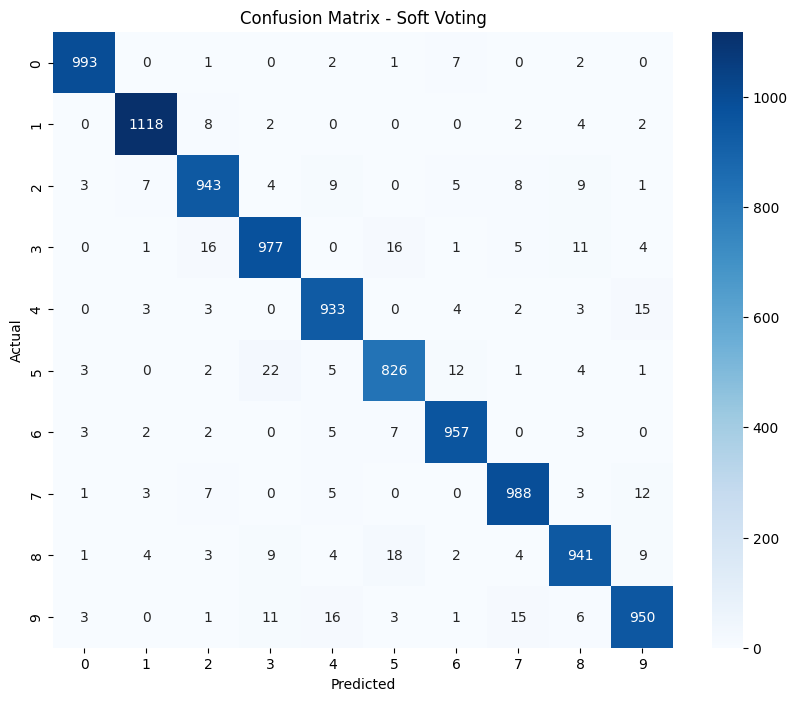

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 預測集合集
voting_pred_test = voting_clf.predict(X_test)

# 混淆矩陣
cm = confusion_matrix(y_test, voting_pred_test)

# 可視化混淆矩陣
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Soft Voting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




In [6]:
voting_clf = VotingClassifier(estimators=[
    ('random_forest', best_rf_clf),
    ('extra_trees', best_et_clf)
], voting='soft')


voting_clf.fit(X_train, y_train)
voting_pred_val = voting_clf.predict(X_val)
print("Soft Voting 驗證集準確率:", accuracy_score(y_val, voting_pred_val))


voting_pred_test = voting_clf.predict(X_test)
print("Soft Voting 測試集準確率:", accuracy_score(y_test, voting_pred_test))


Soft Voting 驗證集準確率: 0.9711
Soft Voting 測試集準確率: 0.9698


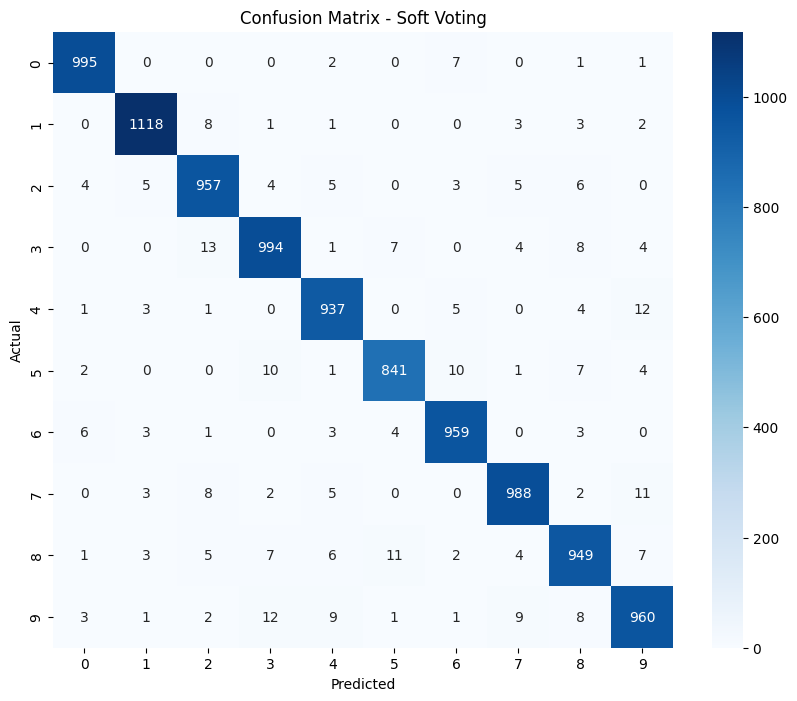

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 預測集合集
voting_pred_test = voting_clf.predict(X_test)

# 混淆矩陣
cm = confusion_matrix(y_test, voting_pred_test)

# 可視化混淆矩陣
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Soft Voting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

